In [2]:
import pandas as pd
import sys

In [6]:
df_raw = pd.read_csv("../data/export/20210429_141413_initial_data.csv")
df_raw = df_raw.set_index("0", verify_integrity=False)
df_raw.index.rename("datetime", inplace=True)
print(df_raw.shape)
df_raw.head(10)

(3600, 17)


,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
datetime,,,,,,,,,,,,,,,,,
20210429_131406823706,60,2,1,145,0,0,0,1,0,10,0,18,26,3,39,8,57
20210429_131407444449,60,2,1,145,0,0,0,1,0,10,0,18,26,3,39,8,57
20210429_131408430269,60,2,1,145,0,0,0,1,0,10,0,18,26,3,39,7,56
20210429_131409441688,60,2,1,144,0,0,0,0,0,11,0,20,26,3,39,7,57
20210429_131410441899,60,2,1,145,0,0,0,1,0,12,0,22,26,3,39,7,62
20210429_131411441076,60,2,1,145,0,0,0,1,0,11,0,20,26,3,39,7,59
20210429_131412444413,60,2,1,148,0,0,0,3,0,11,0,20,26,3,39,7,64
20210429_131413447115,60,2,1,148,0,0,0,3,0,11,0,20,26,3,39,7,64
20210429_131414447309,60,2,1,145,0,0,0,1,0,10,0,18,26,3,39,7,56


In [7]:
df = df_raw.copy(deep=True)
df["sum"]= df.sum(axis=1) - df["17"] - 256
df["CO2_ppm"] = (df["3"].values << 8) | df["4"]
df["CH2O_ugm3"] = (df["5"].values << 8) | df["6"]
df["TVOC_ugm3"] = (df["7"].values << 8) | df["8"]
df["PM2.5"] = (df["9"].values << 8) | df["10"]
df["PM10"] = (df["11"].values << 8) | df["12"]
df["temperature"] = df["13"] + df["14"]/10
df["humidity"] = df["15"] + df["16"] /10
df["checksum"] = df["17"]
df=df.drop(columns=["1", "2", "3", "4", "5", "6", "7", "8", "9", "10", "11", "12", "13", "14", "15", "16", "17"])

assert all(df["sum"] == df["checksum"])

In [8]:
df.head()

,sum,CO2_ppm,CH2O_ugm3,TVOC_ugm3,PM2.5,PM10,temperature,humidity,checksum
datetime,,,,,,,,,
20210429_131406823706,57,401,0,1,10,18,26.3,39.8,57
20210429_131407444449,57,401,0,1,10,18,26.3,39.8,57
20210429_131408430269,56,401,0,1,10,18,26.3,39.7,56
20210429_131409441688,57,400,0,0,11,20,26.3,39.7,57
20210429_131410441899,62,401,0,1,12,22,26.3,39.7,62


<AxesSubplot:xlabel='datetime'>

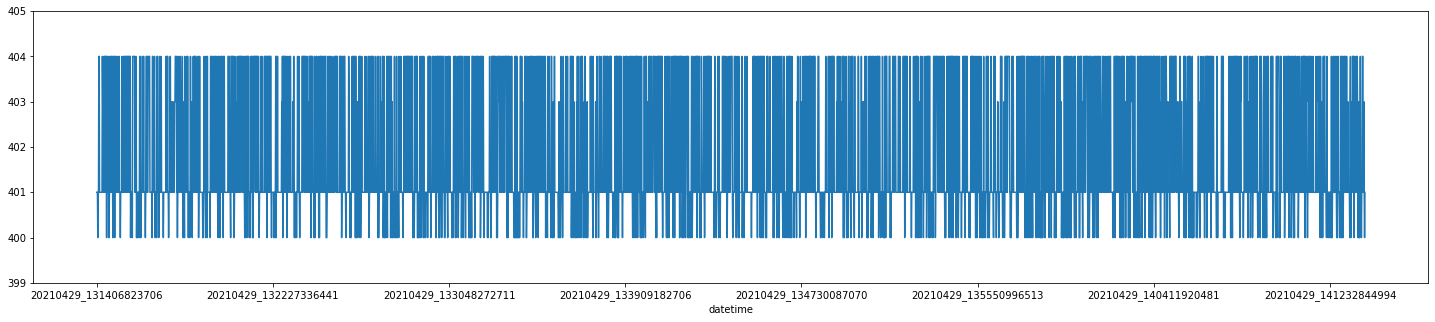

In [9]:
df["CO2_ppm"].plot(figsize=(25,5), ylim=(399,405))

<AxesSubplot:xlabel='datetime'>

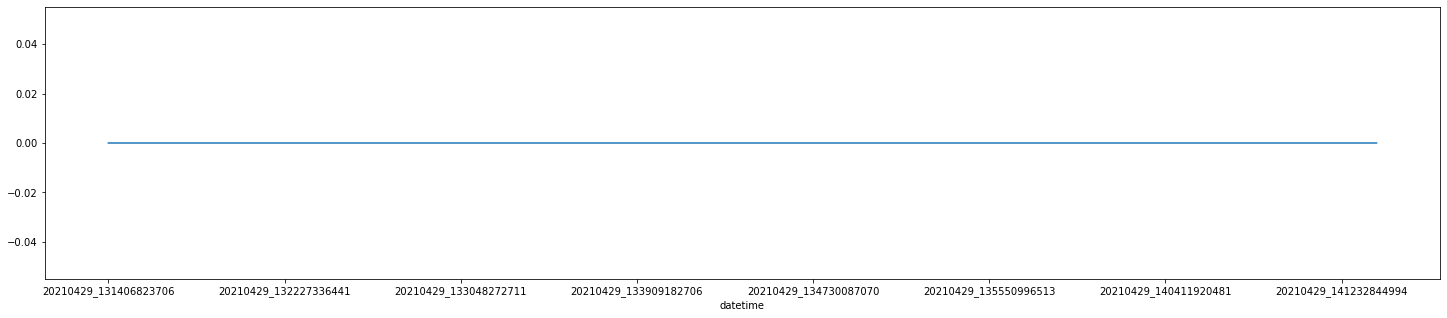

In [10]:
df["CH2O_ugm3"].plot(figsize=(25,5))

<AxesSubplot:xlabel='datetime'>

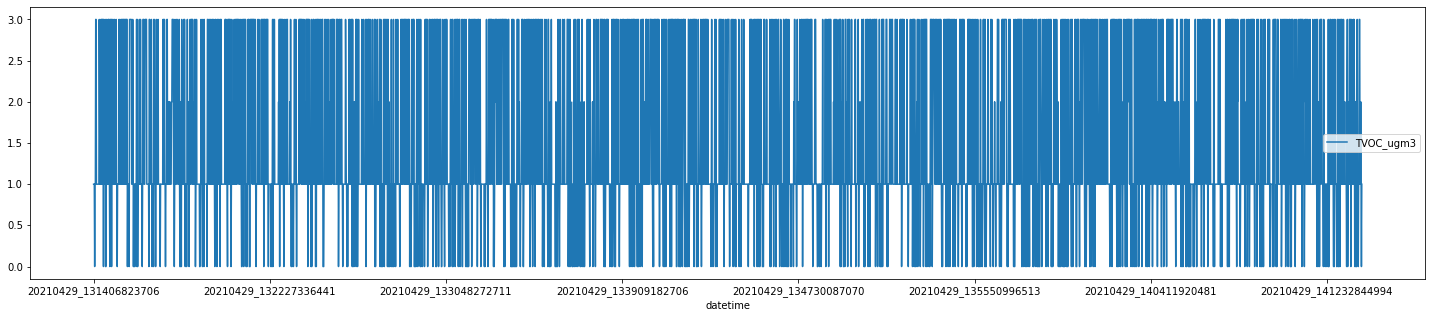

In [11]:
df[["TVOC_ugm3"]].plot(figsize=(25,5))

<AxesSubplot:xlabel='datetime'>

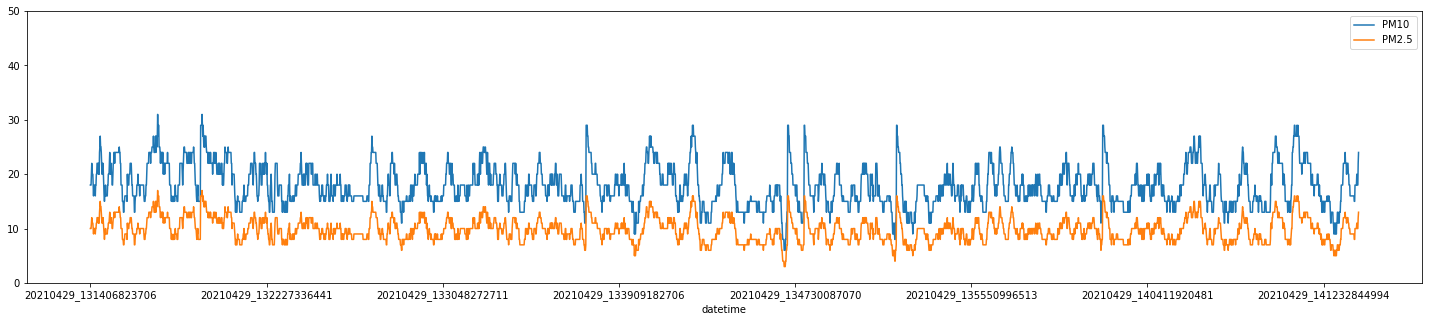

In [13]:
df[["PM10", "PM2.5"]].plot(ylim=(0,50), figsize=(25,5))

<AxesSubplot:xlabel='datetime'>

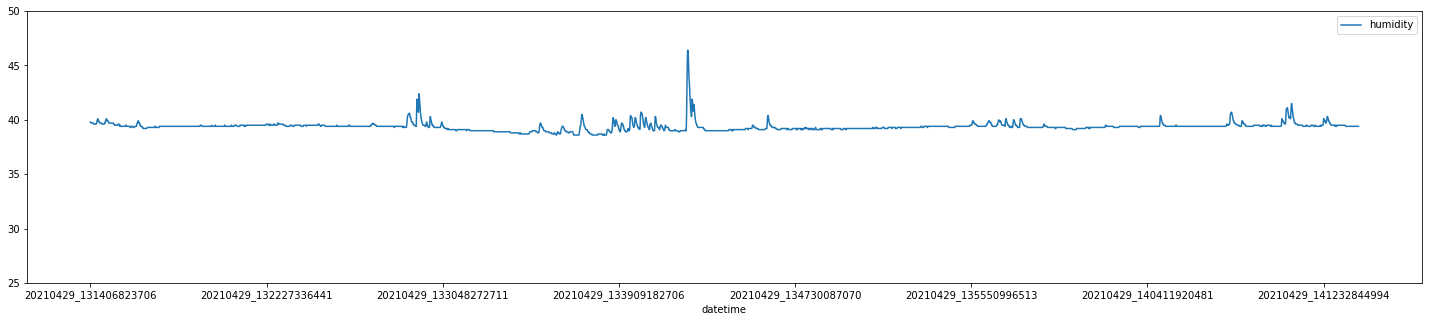

In [14]:
df[["humidity"]].plot(ylim=(25,50), figsize=(25,5))

<AxesSubplot:xlabel='datetime'>

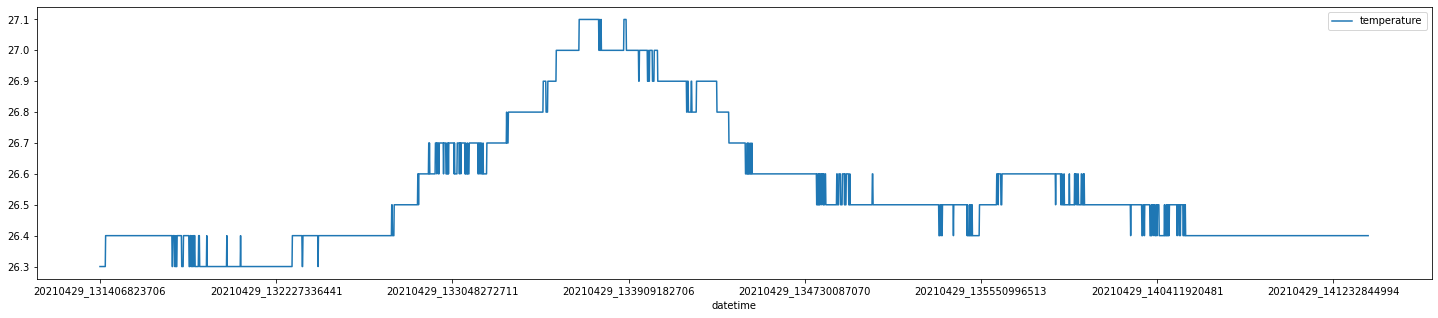

In [15]:
df[["temperature"]].plot(figsize=(25,5))